In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
import multiprocessing as mp
import gc

In [3]:
cd ../Downloads/gaia/

/Users/tianqiu/Downloads/gaia


In [4]:
g=pd.read_csv('dec126-result.csv')

In [66]:
def direct(ra,dec,pmra,pmdec): 
    dx=-np.sin(ra/180*np.pi)*np.cos(dec/180*np.pi)*pmra-np.cos(ra/180*np.pi)*np.sin(dec/180*np.pi)*pmdec
    dy=np.cos(ra/180*np.pi)*np.cos(dec/180*np.pi)*pmra-np.sin(ra/180*np.pi)*np.sin(dec/180*np.pi)*pmdec
    dz=np.cos(dec/180*np.pi)*pmdec
    return dx,dy,dz


In [74]:
data=direct(g.ra,g.dec,g.pmra,g.pmdec)

In [106]:
df={'ra':g.ra,'dec':g.dec,'pmra':g.pmra,'pmdec':g.pmdec,'g_mag':g.phot_g_mean_mag,'dx':data[0],'dy':data[1],'dz':data[2]}

In [107]:
d=pd.DataFrame(data=df)

In [108]:
xm=[]
dm=[[] for i in range(3)]
for i in range(360):
    t=d[(d.ra>i)&(d.ra<=(i+1))]
    if t.empty:
        continue
    for j in range(3):
        dm[j].append(np.mean(t.iloc[:,j+5]))

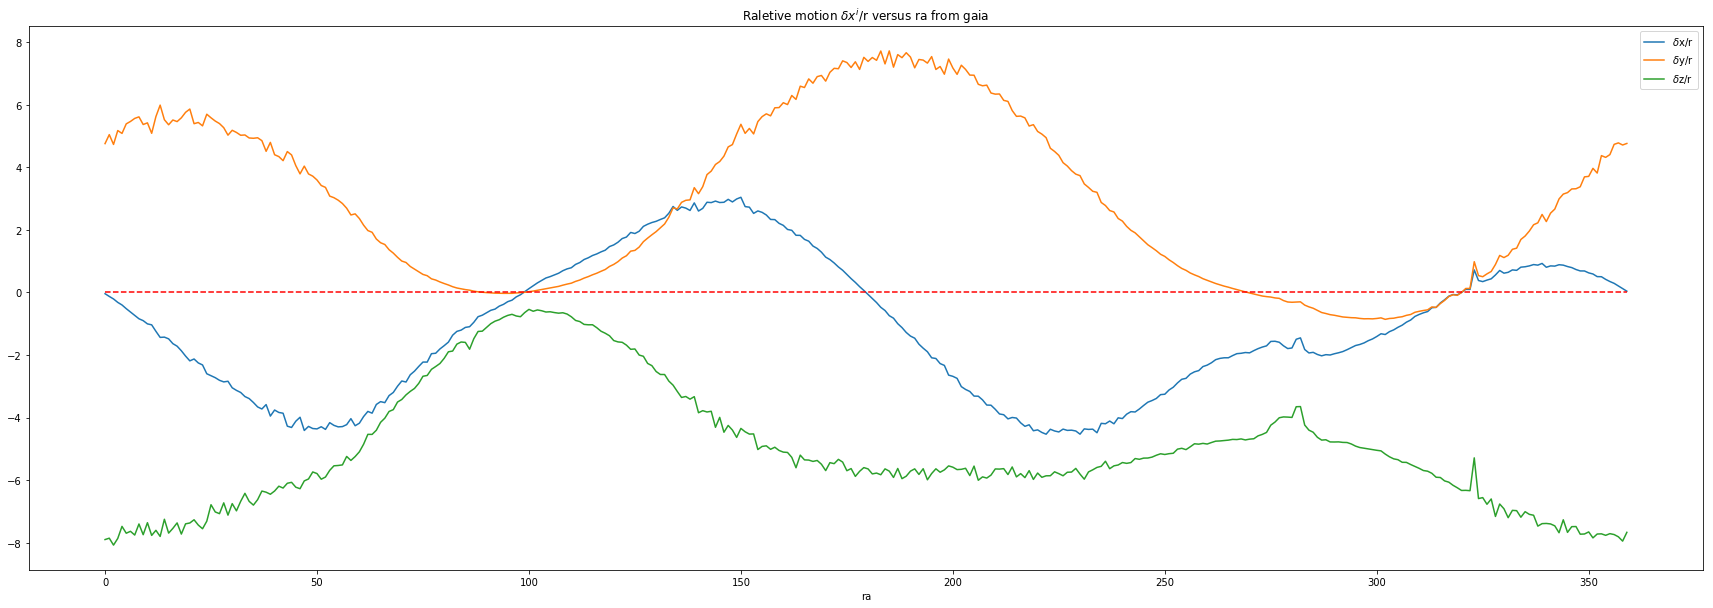

In [166]:
plt.figure(figsize=(30,10))
c=['x','y','z']
plt.title(r'Raletive motion $\delta x^i$/r versus ra from gaia')
for i in range(3):
    plt.plot(range(360),dm[i],label=r'$\delta$'+c[i]+'/r')
    plt.xlabel('ra')
plt.plot(range(360),[0 for i in range(360)],'r--')
plt.legend()
plt.savefig('Raletive_motion_gaia.png')

In [119]:
m=m[m.matchednum!=0]

In [120]:
mdata=direct(m.gra,m.gdec,m.pmra,m.pmdec)

In [121]:
df2={'ra':m.gra,'dec':m.gdec,'pmra':m.pmra,'pmdec':m.pmdec,'g_mag':m.phot_g_mean_mag,'dx':mdata[0],'dy':mdata[1],'dz':mdata[2]}

In [122]:
d2=pd.DataFrame(data=df2)

In [124]:
xm2=[]
dm2=[[] for i in range(3)]
for i in range(360):
    t2=d2[(d2.ra>i)&(d2.ra<=(i+1))]
    if t2.empty:
        continue
    xm2.append(i)
    for j in range(3):
        dm2[j].append(np.mean(t2.iloc[:,j+5]))

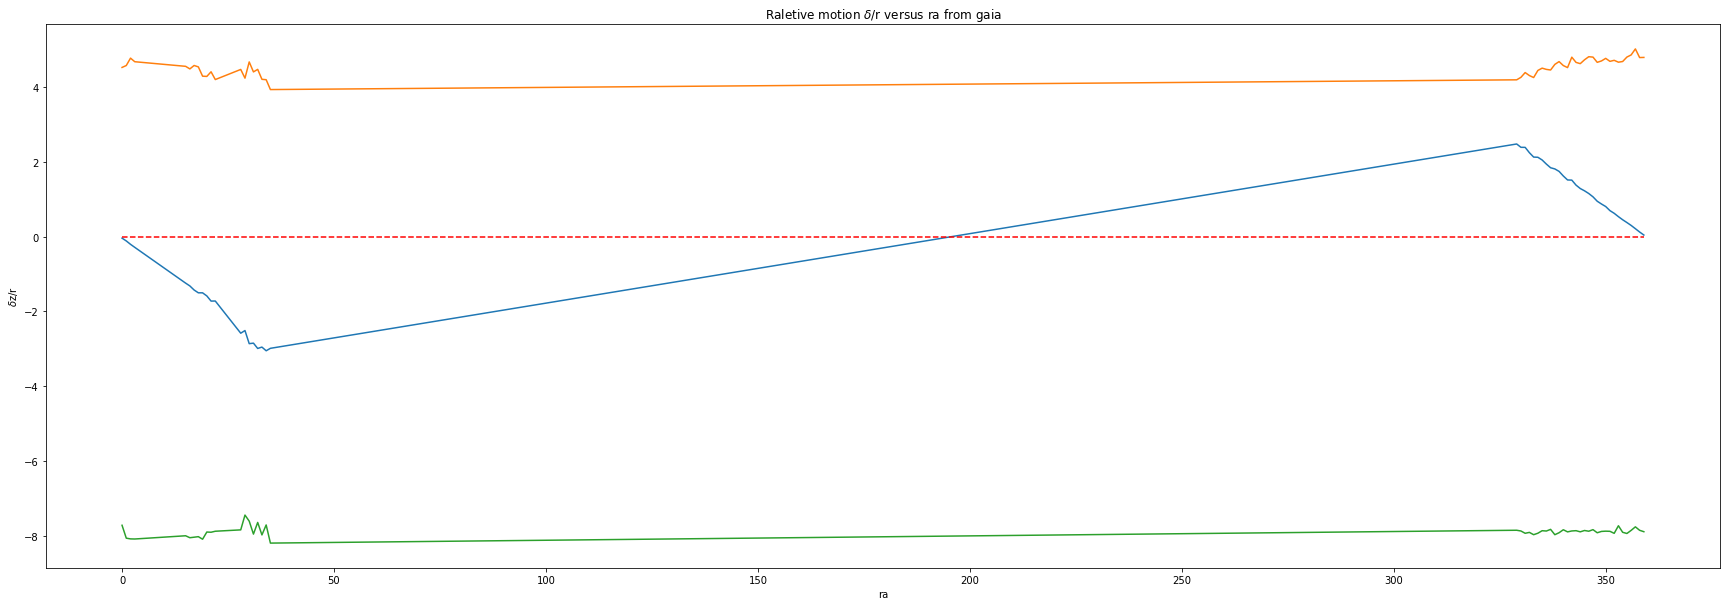

In [163]:
plt.figure(figsize=(30,10))
c=['x','y','z']
plt.title(r'Raletive motion $\delta$/r versus ra from gaia')
for i in range(3):
    plt.plot(xm2,dm2[i])
    plt.xlabel('ra')
    plt.ylabel(r'$\delta$'+c[i]+'/r')
plt.plot(range(360),[0 for i in range(360)],'r--')    
plt.savefig('Raletive_motion_matched_gaia.png')

In [157]:
g3=pd.read_csv('gaiaolS82.csv')
data3=direct(g3.ra,g3.dec,g3.pmra,g3.pmdec)
df3={'ra':g3.ra,'dec':g3.dec,'pmra':g3.pmra,'pmdec':g3.pmdec,'g_mag':g3.phot_g_mean_mag,'dx':data3[0],'dy':data3[1],'dz':data3[2]}
d3=pd.DataFrame(data=df3)

In [161]:
xm3=[]
dm3=[[] for i in range(3)]
for i in range(360):
    t3=d3[(d3.ra>i)&(d3.ra<=(i+1))]
    if t3.empty:
        continue
    xm3.append(i)
    for j in range(3):
        dm3[j].append(np.mean(t3.iloc[:,j+5]))

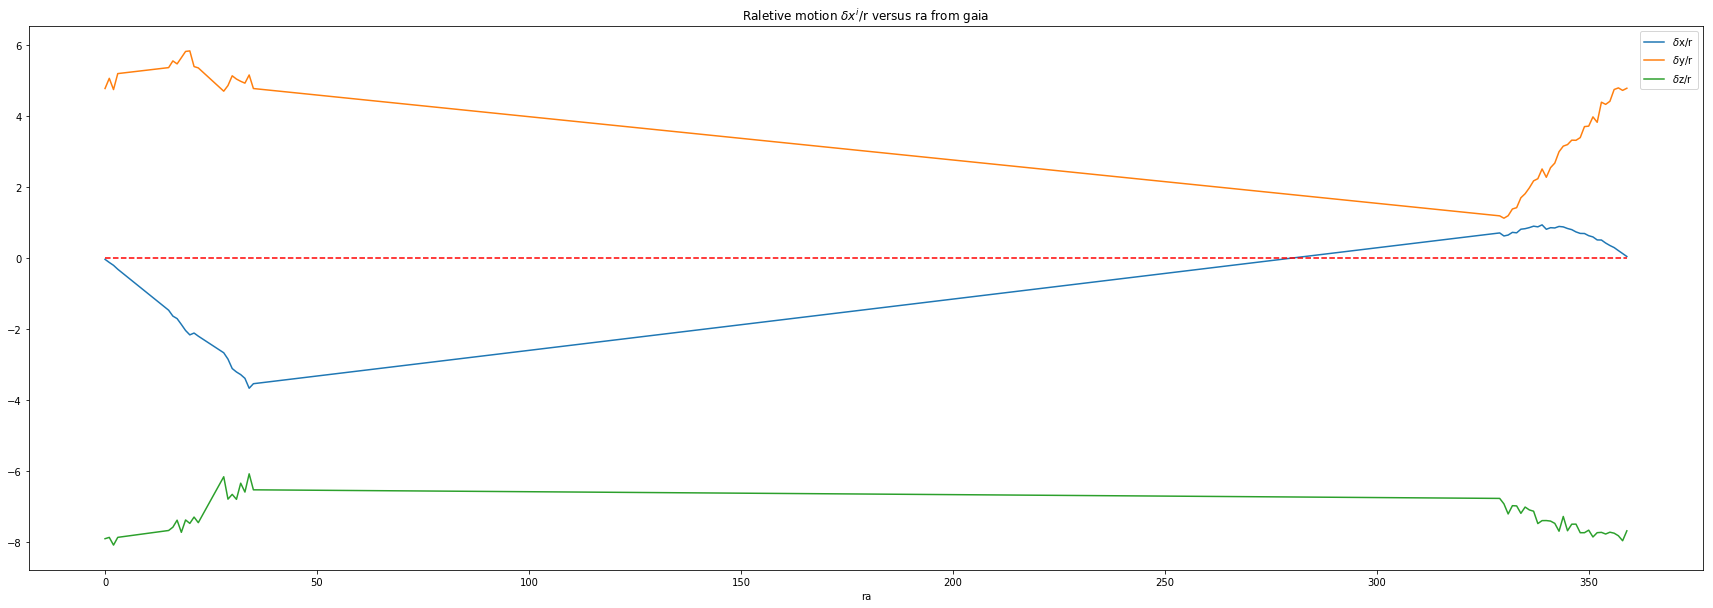

In [162]:
plt.figure(figsize=(30,10))
c=['x','y','z']
plt.title(r'Raletive motion $\delta x^i$/r versus ra from gaia')
for i in range(3):
    plt.plot(xm3,dm3[i],label=r'$\delta$'+c[i]+'/r')
    plt.xlabel('ra')
plt.plot(range(360),[0 for i in range(360)],'r--')
plt.legend()
#plt.savefig('Raletive_motion_gaia.png')